In [1]:
import os,sys
import json
import torch

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [2]:
from src.model import TwoLayerConvGRUNet
from src.utils import plot
from src.train import train_loop

In [3]:
# 构建数据集
from torch.utils.data import DataLoader,Subset
from src.dataset import build_global_vocab_and_maxcount, CLEVRMultiLabelByImage

clevr_root = "../CLEVR_v1.0"

colors = ['blue', 'brown', 'cyan', 'gray', 'green', 'purple', 'red', 'yellow']
shapes = ['cube', 'cylinder', 'sphere']
max_objects = 10

train_ds = CLEVRMultiLabelByImage(
    clevr_root=clevr_root,
    split="train",
    colors=colors,
    shapes=shapes,
    max_objects=max_objects,
)

val_ds = CLEVRMultiLabelByImage(
    clevr_root=clevr_root,
    split="val",
    colors=colors,
    shapes=shapes,
    max_objects=max_objects,
)

# 取前 N 个样本（最快、可复现）
N = 2000
train_ds_small = Subset(train_ds, list(range(N)))
val_ds_small = Subset(val_ds, list(range(N)))

train_dl = DataLoader(train_ds, batch_size=100, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=100, shuffle=True, num_workers=0)


In [4]:
model = TwoLayerConvGRUNet()

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 选设备
steps = 3  # 迭代步数
epochs = 15 # 训练轮数


In [6]:

history = train_loop(
    model=model,               # 你的 TwoLayerConvGRUNet
    train_loader=train_dl, # 你的 DataLoader
    device=device,             # device
    steps=steps,               # steps
    epochs=epochs,             # epochs
    lr=1e-3,                   # lr
    loss_mode="all",          # 推荐先用 last
    threshold=0.5,             # strict 阈值
    grad_clip_norm=1.0,        # 建议保留
    val_loader=None,           # 没有就 None
    ckpt_dir="../checkpoints",
    ckpt_name="convrnn_GN.pt",
    colors=colors,
    shapes=shapes,
)



Epoch 001 | color_acc = 0.0058 count_acc = 0.2679 color_count = 0.0001 
Epoch 002 | color_acc = 0.0056 count_acc = 0.4625 color_count = 0.0002 
Epoch 003 | color_acc = 0.0116 count_acc = 0.5360 color_count = 0.0005 
Epoch 004 | color_acc = 0.0316 count_acc = 0.6066 color_count = 0.0023 
Epoch 005 | color_acc = 0.0860 count_acc = 0.6682 color_count = 0.0132 
Epoch 006 | color_acc = 0.2644 count_acc = 0.7100 color_count = 0.0703 
Epoch 007 | color_acc = 0.5182 count_acc = 0.7518 color_count = 0.2099 
Epoch 008 | color_acc = 0.8839 count_acc = 0.7776 color_count = 0.4825 
Epoch 009 | color_acc = 0.9665 count_acc = 0.8137 color_count = 0.6597 
Epoch 010 | color_acc = 0.9761 count_acc = 0.8239 color_count = 0.7366 
Epoch 011 | color_acc = 0.9812 count_acc = 0.8545 color_count = 0.7845 
Epoch 012 | color_acc = 0.9847 count_acc = 0.8764 color_count = 0.8183 
Epoch 013 | color_acc = 0.9871 count_acc = 0.8781 color_count = 0.8376 
Epoch 014 | color_acc = 0.9884 count_acc = 0.8944 color_count = 

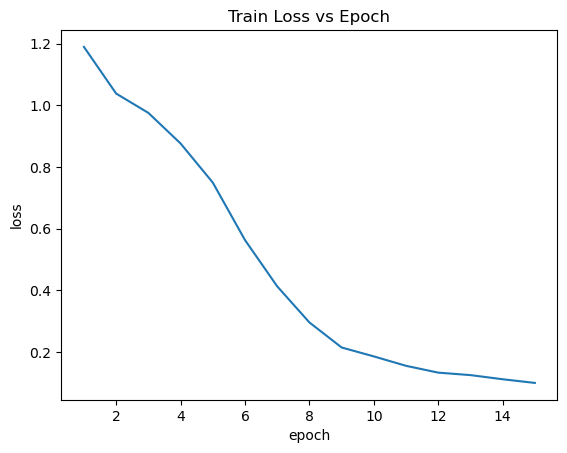

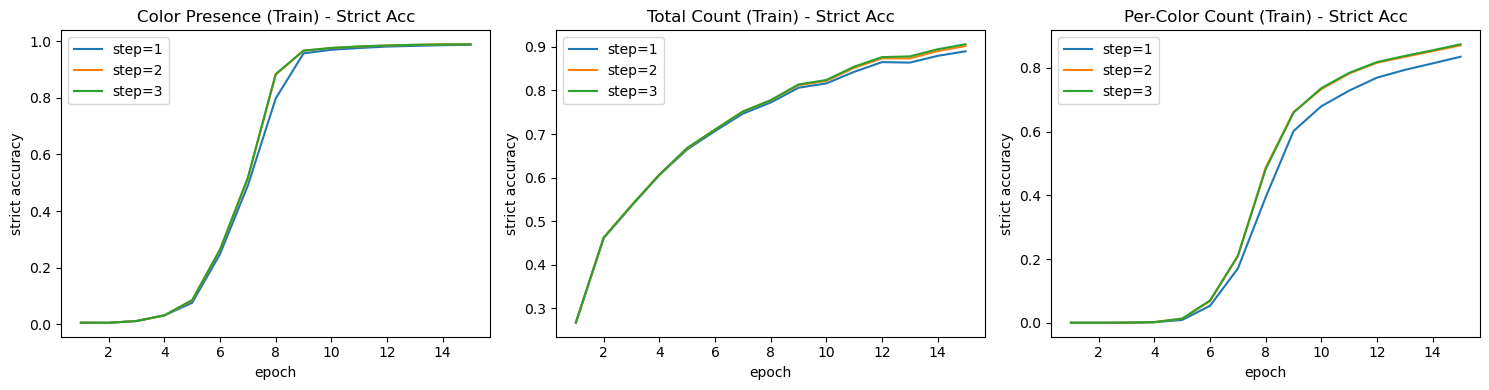

In [7]:
plot(history)